# Supervised Learning Project

## Bank Personal Loan Campaign

Import the libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load de data from CSV file and show its shape

In [2]:
bData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
bData.shape

(5000, 14)

Show the first five rows of the Data Frame

In [3]:
bData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Check for the missing values in the Data Frame by  column

In [4]:
bData.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
bData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Check for NA values in the entire Data Frame

In [6]:
bData.isnull().values.sum()

0

Show the types of each column in the Data Frame

In [7]:
bData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Generate descriptive statistics of the Data Frame

In [8]:
bData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Verify the negative values of Experience observed in the Describe seccion from above

In [9]:
bData.Experience.sort_values(ascending=True)

4514    -3
2618    -3
4285    -3
3626    -3
3796    -2
        ..
1480    42
465     42
2846    43
3886    43
4360    43
Name: Experience, Length: 5000, dtype: int64

Check the ammount of negative values in the Experience Series

In [10]:
bData.query('Experience < 0')[['Experience']].count()

Experience    52
dtype: int64

Create a new Data Frame with just positive values (including 0s) of Experience Series

In [11]:
posDataExp = bData.loc[bData['Experience'] >= 0]

Create a list of the IDs with the negative values of Exprierencie and show its length to confirm the 52 items obtained before.

In [12]:
idList = bData.query('Experience < 0')[['ID']]
idList = idList['ID'].tolist()
len(idList)

52

Check number of rows of positive values the verify if all data is included (5000 records)

In [13]:
len(posDataExp)

4948

Replace all negative values in the Experience Series with the median of the same age and level education of each person identified by ID. The mean is calculated using the positive values selected in the recent created Data Frame: posDataExp. 
I use the median to avoid decimal numbers on the Experience series and keep it as an integer data type.

In [14]:
for ids in idList:
    age = bData.loc[np.where(bData['ID']== ids )]["Age"].tolist()[0]
    edu = bData.loc[np.where(bData['ID']== ids )]["Education"].tolist()[0]
    fltr = posDataExp[(posDataExp.Age == age) & (posDataExp.Education == edu)]
    exp = fltr['Experience'].median()
    bData.loc[bData.loc[np.where(bData['ID']== ids )].index, 'Experience'] = exp

Verifiying for null values

In [15]:
bData.isnull().sum()

ID                     0
Age                    0
Experience            12
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [16]:
bData.query('Experience.isnull()', engine='python')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
670,671,23,NaN,61,92374,4,2.60,1,239,0,0,0,1,0
909,910,23,NaN,149,91709,1,6.33,1,305,0,0,0,0,1
2430,2431,23,NaN,73,92120,4,2.60,1,0,0,0,0,1,0
2618,2619,23,NaN,55,92704,3,2.40,2,145,0,0,0,1,0
2717,2718,23,NaN,45,95422,4,0.60,2,0,0,0,0,1,1
2962,2963,23,NaN,81,91711,2,1.80,2,0,0,0,0,0,0
3130,3131,23,NaN,82,92152,2,1.80,2,0,0,1,0,0,1
3157,3158,23,NaN,13,94720,4,1.00,1,84,0,0,0,1,0
3425,3426,23,NaN,12,91605,4,1.00,1,90,0,0,0,1,0
3824,3825,23,NaN,12,95064,4,1.00,1,0,0,1,0,0,1


Replacing null values with 1 assuming that all have an income and CCAvg > 0 

In [17]:
bData.Experience.fillna(1, inplace = True)

In [18]:
bData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Verifying that none negative value is present

In [19]:
bData.query('Experience < 0')[['Experience']].count()

Experience    0
dtype: int64

# Section 2 - EDA

Show unique values of each Series

In [20]:
bData.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Numberof people with zero mortgage

In [21]:
bData.query('Mortgage == 0')[['ID']].count()

ID    3462
dtype: int64

Number of people with zero credit card spending per month

In [22]:
bData.query('CCAvg  == 0')[['ID']].count()

ID    106
dtype: int64

Value counts of all categorical columns

In [23]:
bData['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [24]:
bData['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [25]:
bData['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [26]:
bData['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [27]:
bData['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [28]:
bData['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [29]:
bData['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

Remove the ID series from de DataFrame

In [30]:
bData = bData.drop('ID', axis = 1)

## Univariate

In [31]:
bData.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994178,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994178,1.000000,-0.046887,-0.028684,-0.052204,-0.049937,0.013640,-0.010879,-0.008030,-0.001114,0.009926,0.013834,0.009051
Income,-0.055269,-0.046887,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028684,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052204,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049937,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013640,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010879,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008030,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001114,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [32]:
bData.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\to

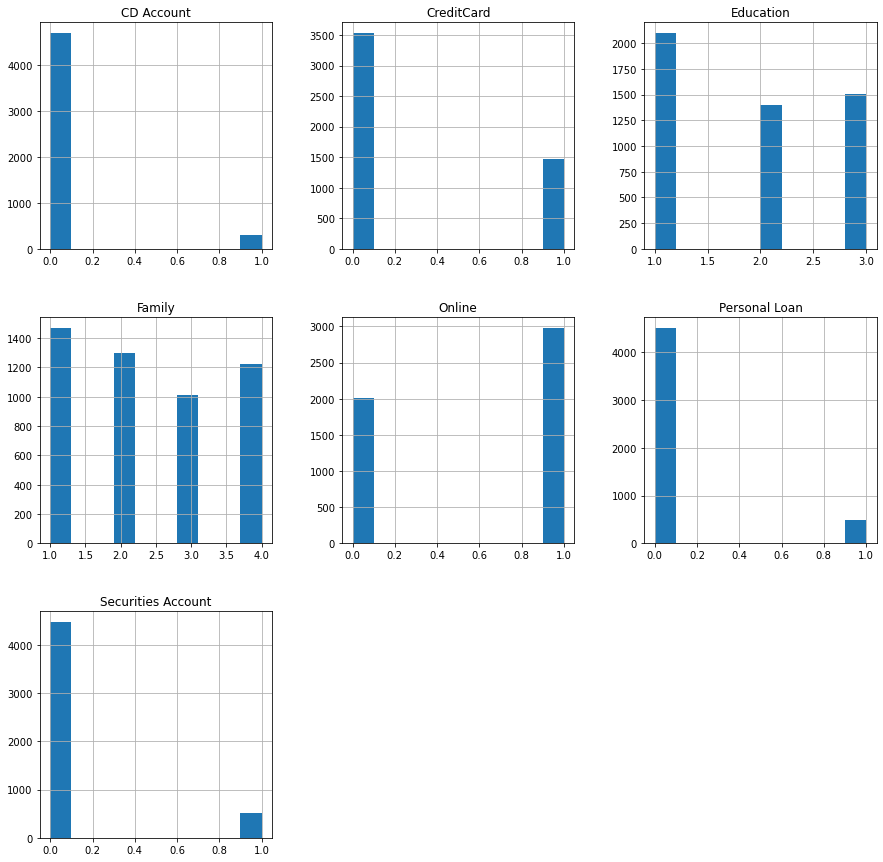

In [33]:
bData[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online','CreditCard']].hist(figsize=(15,15));
plt.show()

In [34]:
bData[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online','CreditCard']].corr()

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
Family,1.000000,0.064929,0.061367,0.019994,0.014110,0.010354,0.011588
Education,0.064929,1.000000,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Personal Loan,0.061367,0.136722,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,0.019994,-0.010812,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.014110,0.013934,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.010354,-0.015004,0.006278,0.012627,0.175880,1.000000,0.004210
CreditCard,0.011588,-0.011014,0.002802,-0.015028,0.278644,0.004210,1.000000


Plotting only the features that makes sense for this data.
ZIP Code, Family, Education, Personal Loan, Securities Account, CD Account, Online, and CreditCard are categorical data.

In [35]:
univars = ['Age', 'Experience', 'Income', 'CCAvg','Mortgage','Education']

D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Users\Alx\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\to

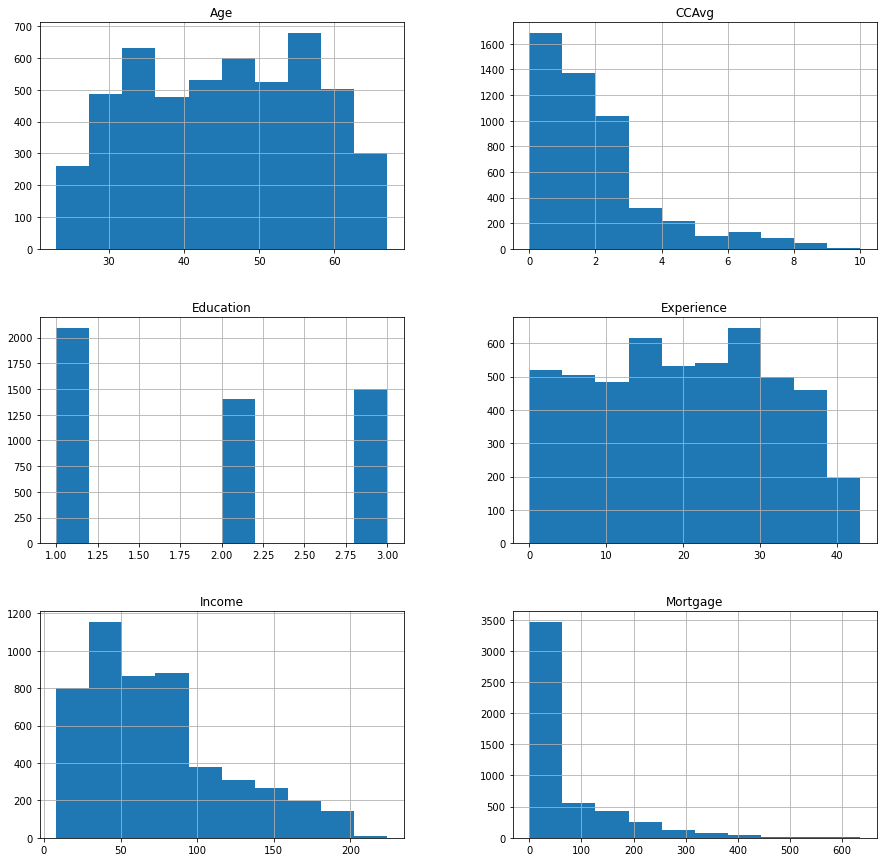

In [36]:
bData[univars].hist(figsize=(15,15));
plt.show()

In [37]:
bData[univars].corr()

,Age,Experience,Income,CCAvg,Mortgage,Education
Age,1.000000,0.994178,-0.055269,-0.052012,-0.012539,0.041334
Experience,0.994178,1.000000,-0.046887,-0.049937,-0.010879,0.013640
Income,-0.055269,-0.046887,1.000000,0.645984,0.206806,-0.187524
CCAvg,-0.052012,-0.049937,0.645984,1.000000,0.109905,-0.136124
Mortgage,-0.012539,-0.010879,0.206806,0.109905,1.000000,-0.033327
Education,0.041334,0.013640,-0.187524,-0.136124,-0.033327,1.000000


## Bivariate

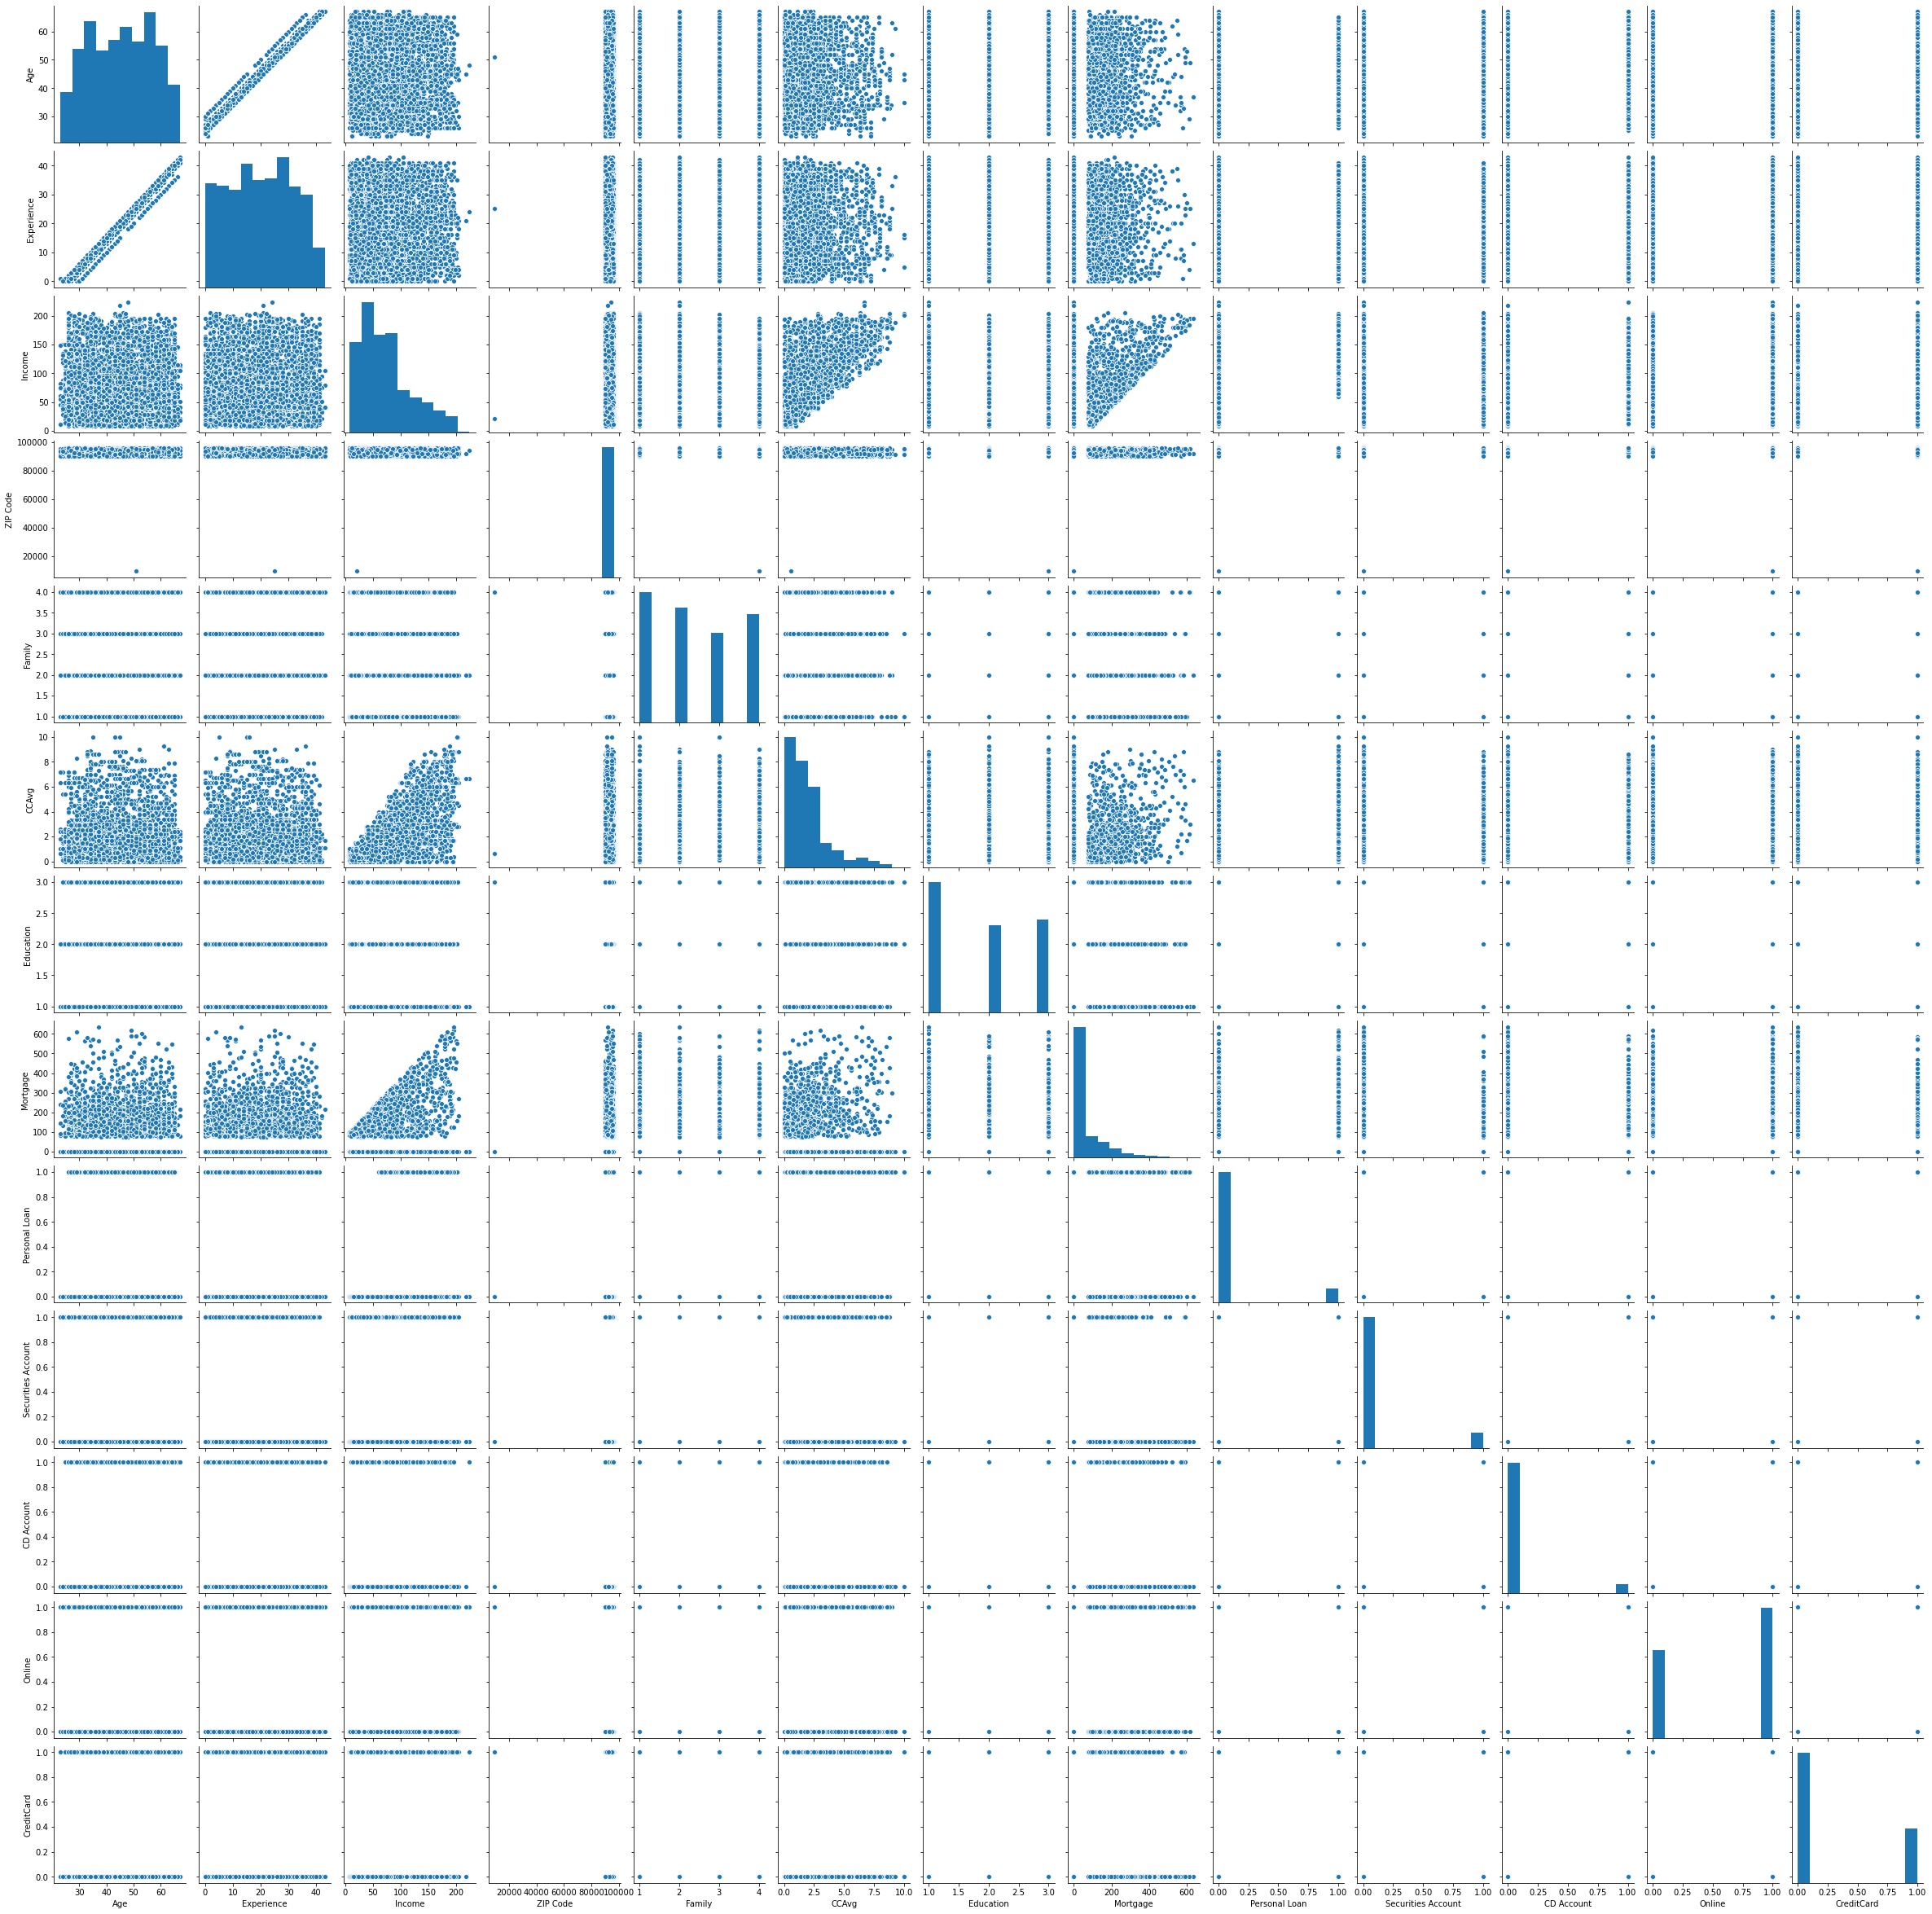

In [38]:
sns.pairplot(bData);

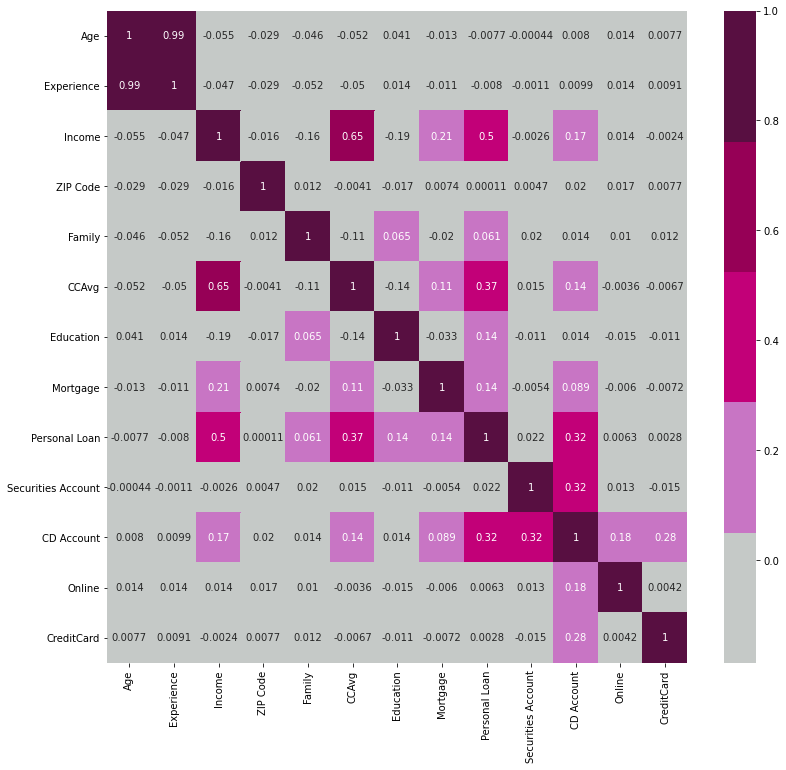

In [39]:
fig, ax = plt.subplots(figsize=(13,12))
xcolors = ["silver", "orchid", "magenta", "dark magenta","plum"]
sns.heatmap(bData.corr(), annot=True, cmap=sns.xkcd_palette(xcolors));

A zoom in to most correlated features

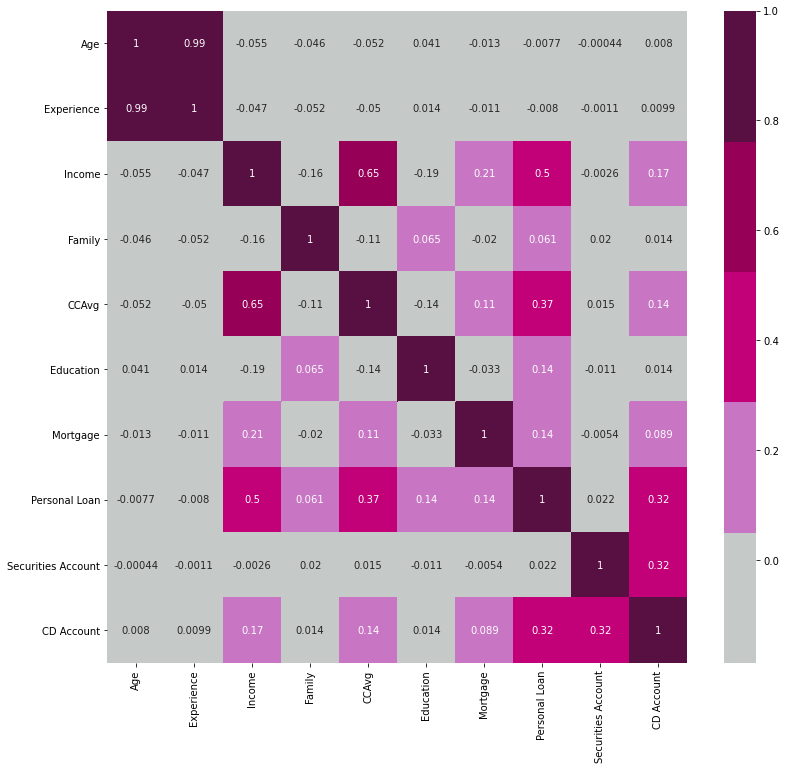

In [40]:
fig, ax = plt.subplots(figsize=(13,12))
hmvars = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account','CD Account'  ]
sns.heatmap(bData[hmvars].corr(), annot=True, cmap=sns.xkcd_palette(xcolors));

In [41]:
bData['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [42]:
bData.query('`Personal Loan` == 1')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9.0,180,93023,1,8.9,3,0,1,0,0,0,0
16,38,14.0,130,95010,4,4.7,3,134,1,0,0,0,0
18,46,21.0,193,91604,2,8.1,3,0,1,0,0,0,0
29,38,13.0,119,94104,1,3.3,2,0,1,0,1,1,1
38,42,18.0,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13.0,129,92646,3,4.1,3,0,1,0,1,1,1
4927,43,19.0,121,94720,1,0.7,2,0,1,0,1,1,1
4941,28,4.0,112,90049,2,1.6,2,0,1,0,0,1,0
4962,46,20.0,122,90065,3,3.0,3,0,1,0,1,1,1


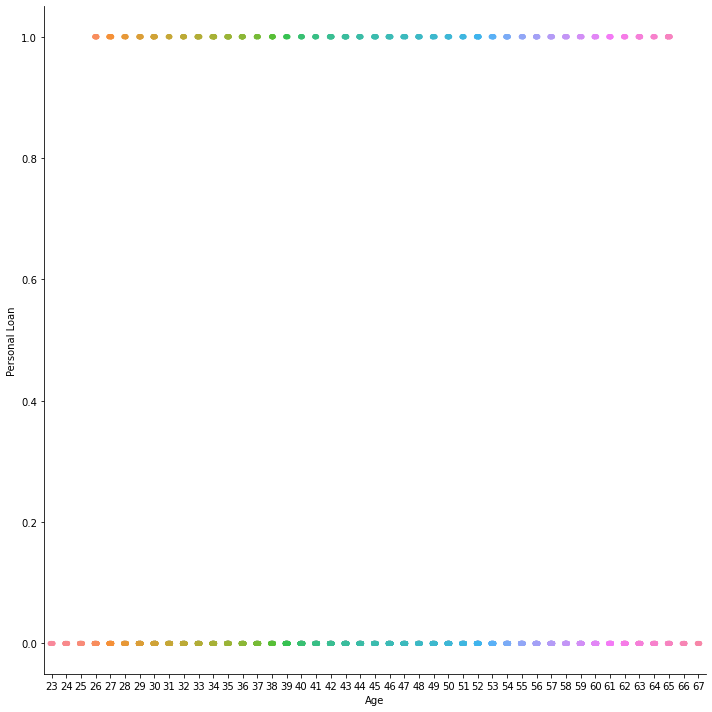

In [43]:
sns.catplot(x = 'Age', y = 'Personal Loan', data = bData, height=10);

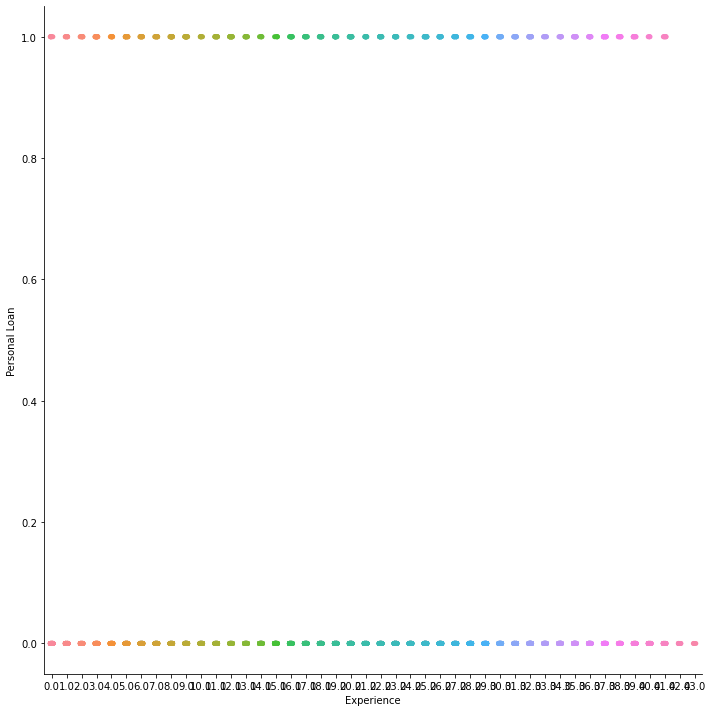

In [44]:
sns.catplot(x = 'Experience', y = 'Personal Loan', data = bData, height=10);

# Split Data

## Preparing data

In [45]:
x = bData.drop('Personal Loan', axis = 1)
x = x.drop('ZIP Code', axis = 1)
y = bData['Personal Loan']

Create Dummy Variables

In [46]:
x = pd.get_dummies(x, columns=['Education'])
x.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1.0,49,4,1.6,0,1,0,0,0,1,0,0
1,45,19.0,34,3,1.5,0,1,0,0,0,1,0,0
2,39,15.0,11,1,1.0,0,0,0,0,0,1,0,0
3,35,9.0,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8.0,45,4,1.0,0,0,0,0,1,0,1,0


Rename Education Dummy variables and drop the last one (Advanced/Professional)

In [47]:
x = x.rename(columns={"Education_1":"Undergrad"})
x = x.rename(columns={"Education_2": "Graduate"})
x = x.drop('Education_3', axis = 1)
x.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Undergrad,Graduate
0,25,1.0,49,4,1.6,0,1,0,0,0,1,0
1,45,19.0,34,3,1.5,0,1,0,0,0,1,0
2,39,15.0,11,1,1.0,0,0,0,0,0,1,0
3,35,9.0,100,1,2.7,0,0,0,0,0,0,1
4,35,8.0,45,4,1.0,0,0,0,0,1,0,1


### Splitting the data

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state=1)

### Creating and fitting the model

In [49]:
import statsmodels.api as sm
mlogit = sm.Logit(ytrain, sm.add_constant(xtrain))
lg = mlogit.fit()

Optimization terminated successfully.
         Current function value: 0.114094
         Iterations 9


In [50]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.6355
Time:                        13:10:34   Log-Likelihood:                -399.33
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                6.481e-291
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.1305      2.139     -4.270      0.000     -13.322      -4.939
Age                   -0.0054      0.079     -0.068      0.946      -0.160       0.149
Experience             0.0106      0.079      0.135      0.893      -0.144       0.165
Income                 0.0589      0.004     16.465      0.000       0.052       0.066
Family                 0.6488      0.096      6.764      0.000       0.461       0.837
CCAvg                  0.2108      0.054      3.921      0.000       0.105       0.316
Mortgage               0.0010      0.001      1.404      0.160      -0.000       0.002
Securities Account    -1.1605      0.400     -2.903      0.004      -1.944      -0.377
CD Account             3.8377      0.425      9.027      0.000       3.004       4.671
Online                -0.6610      0.200     -3.306      0.001      -1.053      -0.269
CreditCard            -1.0668      0.260     -4.105      0.000      -1.576      -0.557
Undergrad             -4.0403      0.325    -12.444      0.000      -4.677      -3.404
Graduate              -0.1337      0.229     -0.583      0.560      -0.583       0.316
======================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [51]:
mdlCoeffs = pd.DataFrame(lg.params, columns = ['Coeff'])
mdlCoeffs['Odds'] = mdlCoeffs.Coeff.apply(lambda x: np.exp(x))
mdlCoeffs['Probability'] = mdlCoeffs.Odds / (1 + mdlCoeffs.Odds)
mdlCoeffs

,Coeff,Odds,Probability
const,-9.130506,0.000108,0.000108
Age,-0.005366,0.994649,0.498659
Experience,0.010626,1.010682,0.502656
Income,0.058875,1.060642,0.514714
Family,0.648758,1.913162,0.656730
CCAvg,0.210818,1.234687,0.552510
Mortgage,0.001009,1.001010,0.500252
Securities Account,-1.160519,0.313324,0.238573
CD Account,3.837720,46.419501,0.978912
Online,-0.661037,0.516316,0.340507


### Building Loggistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1300, random_state = 42)
logreg.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
ypredicted = logreg.predict(xtest)

In [54]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [55]:
def drwCMatrix(actual, predicted):
    fig, ax = plt.subplots(figsize=(10,8))
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1], cmap=sns.xkcd_palette(xcolors))
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

In [56]:
logreg.score(xtrain, ytrain)

0.9577142857142857

In [57]:
logreg.score(xtest, ytest)

0.9593333333333334

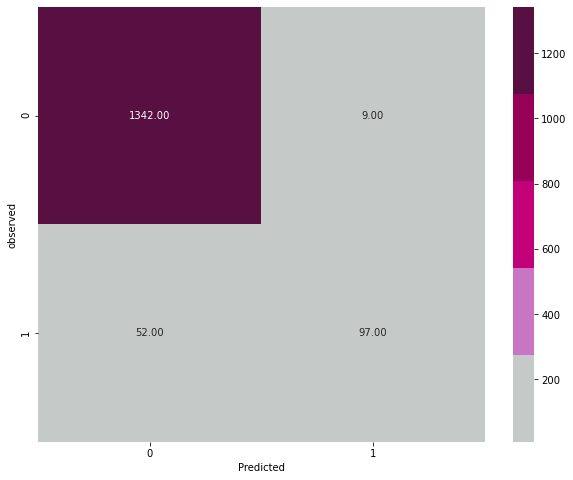

In [58]:
drwCMatrix(ytest, ypredicted)

In [59]:
recall_score(ytest, ypredicted)

0.6510067114093959

In [60]:
precision_score(ytest, ypredicted)

0.9150943396226415

In [61]:
f1_score(ytest, ypredicted)

0.7607843137254902

In [62]:
roc_auc_score(ytest, ypredicted)

0.8221724896795315

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


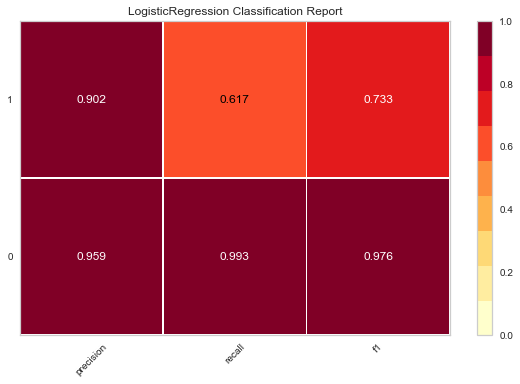

In [63]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(LogisticRegression(random_state=42))
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show();

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


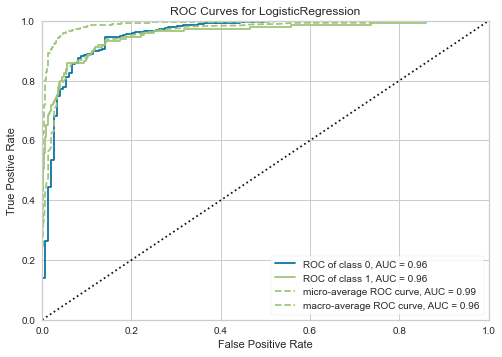

In [64]:
roc = ROCAUC(LogisticRegression(random_state=42))
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show();

In [65]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1300,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 
               'C': [0.01,0.1,0.25,0.5,0.75,1],
               'max_iter':[500,1100],
              'class_weight':['balanced'], 
               'penalty':['l2', 'none']}]
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5, verbose=0)
grid_search.fit(xtrain, ytrain)

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ 

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ 

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio p

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ 

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ 

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ 

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ 

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Users\Alx\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
                          'class_weight': ['balanced'], 'max_iter': [500, 1100],
                          'penalty': ['l2', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='

In [67]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model = grid_search.best_estimator_
model.fit(xtrain, ytrain)
ypredicted = model.predict(xtest)

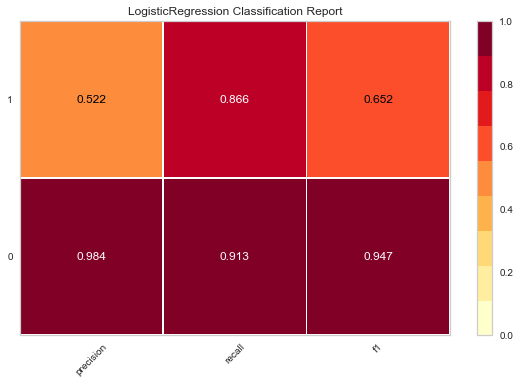

In [69]:
viz = ClassificationReport(model)
viz.fit(xtrain,ytrain)
viz.score(xtest,ytest)
viz.show();

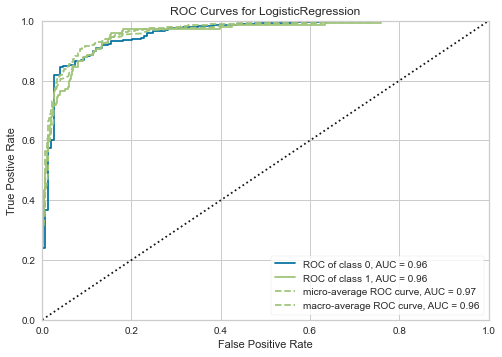

In [70]:
roc = ROCAUC(model)
roc.fit(xtrain,ytrain)
roc.score(xtest,ytest)
roc.show();

In [71]:
print("Recall on for optimized model: ",recall_score(ytest, ypredicted))
print("Precision on for optimized model: ",precision_score(ytest, ypredicted))
print("F1 on for optimized model: ",f1_score(ytest, ypredicted))
print("ROC", roc_auc_score(ytest, ypredicted))

Recall on for optimized model:  0.8657718120805369
Precision on for optimized model:  0.5222672064777328
F1 on for optimized model:  0.6515151515151516
ROC 0.8892145514880848


In [72]:
print('Confusion_matrix:')
print(confusion_matrix(ytest, ypredicted))

Confusion_matrix:
[[1233  118]
 [  20  129]]


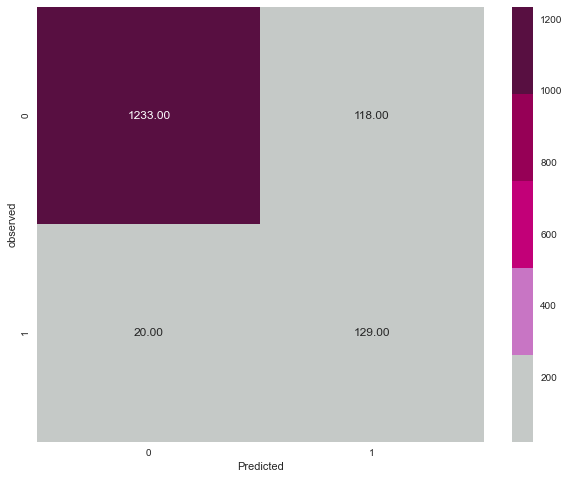

In [73]:
drwCMatrix(ytest, ypredicted)

# Business understanding

### With the original model of Logistic Regression the predictions are:

This are correctly predicted
TP: 1342
TN: 97

This are incorrectly predicted
FP: ("Type I error") 9
FN: ("Type II error") 52

Metrics:
Recall: 0.6510067114093959
ROC: 0.8221724896795315


### After optimize the  Logistic Regression model  the predictions are:

This are correctly predicted
TP: 1233
TN: 129

This are incorrectly predicted
FP: ("Type I error") 118
FN: ("Type II error") 20

Metrics:
Recall: 0.8657718120805369
ROC 0.8892145514880848

### Metrics on both scenarios

In this case, it is more important to identify False Negatives (FN), so Recall is the more significant metric. In this case the optimized model improves the Recall, from  0.651 to 0.865.
The ROC metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. For the optimized model, we can see a small improvement of around .06 (from 0.822 to .0889). This shows that the optimized model is a better model to identify a better way to select customers to offer a personal loan during this campaign. 


